# Assignment 3.1
## Generating datasets with alpha equal to 1.5

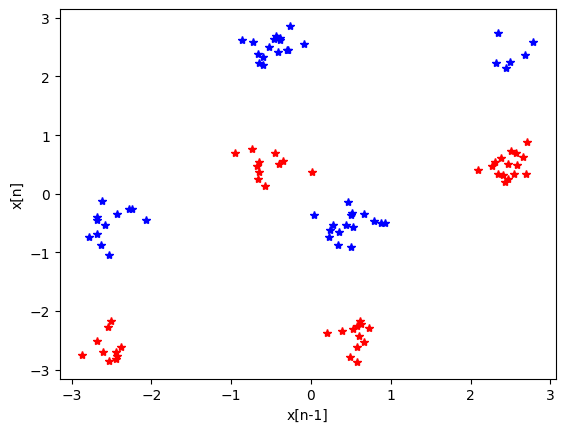

In [109]:
import numpy as np #numerical tools
import scipy.signal as sp #signal processing tools
import matplotlib.pyplot as plt
def data(N,a):
   N=N+3
   h=np.array([1,a])
   y=np.sign(np.random.randn(N,1))
   y=np.reshape(y,len(y))
   t=np.arange(N)
   z=np.convolve(h,y)
   z=z[1:N-1]
   y=y[2:N-1]
   X=np.array([z[0:N-3],z[1:N-2]])+0.2*np.random.randn(2,N-3)
   return X,y

X,y=data(100,1.5)

ind1=np.where(y==1)
ind2=np.where(y==-1)
plt.plot(X[0,ind1],X[1,ind1],'b*')
plt.plot(X[0,ind2],X[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.show()


## Volterra Expansion
### 1, x[n], x[n-1], x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2

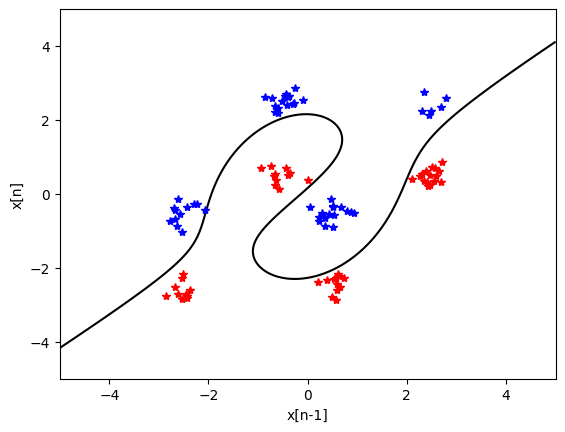

Weights of the MMSE solution:
[ 0.10360481  0.76744869 -0.64871087 -0.04330951 -0.0061763   0.05999572
 -0.21218426  0.13199722  0.30730961 -0.18466744]


In [110]:
def volterra_expansion(X):
    N = X.shape[1]
    X_volterra = np.zeros((10, N))
    
    for n in range(N):
        x_n = X[:, n]                             # x[n], x[n-1]
        X_volterra[0, n] = 1                      # Constant term        # 0th order
        X_volterra[1, n] = x_n[0]                 # x[n]                 # 1st order
        X_volterra[2, n] = x_n[1]                 # x[n-1]               # 1st order 
        X_volterra[3, n] = x_n[0]**2              # x1^2                 # 2nd order
        X_volterra[4, n] = x_n[1]**2              # x2^2                 # 2nd order
        X_volterra[5, n] = x_n[0] * x_n[1]        # x1*x2                # 2nd order
        X_volterra[6, n] = x_n[0]**3              # x1^3                 # 3rd order
        X_volterra[7, n] = x_n[1]**3              # x2^3                 # 3rd order
        X_volterra[8, n] = x_n[0]**2 * x_n[1]     # x1^2*x2              # 3rd order
        X_volterra[9, n] = x_n[0] * x_n[1]**2     # x1*x2^2              # 3rd order

        # Total Equation is
        # 1, x[n], x[n-1], x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2
        
    return X_volterra

## Apply Volterra expansion to the data
X_volterra = volterra_expansion(X)

## Compute MMSE solution
X_volterra_squared = np.dot(X_volterra, X_volterra.T)
Xy = np.dot(X_volterra,y )

w_mmse = np.linalg.solve(X_volterra_squared, Xy)

## Generate decision boundary
# Define a grid of points in the input space
num_points = 400
x_values = np.linspace(-5, 5, num_points)
y_values = np.linspace(-5, 5, num_points)
xx, yy = np.meshgrid(x_values, y_values)
# Create a matrix containing all pairs of x and y coordinates
X_boundary = np.vstack((xx.ravel(), yy.ravel()))
# Apply the Volterra expansion to the grid points
X_volterra_boundary = volterra_expansion(X_boundary)
# Compute the decision boundary using the MMSE weights and Volterra-expanded data
decision_boundary = np.dot(w_mmse, X_volterra_boundary)


## Plot the decision boundary and data points
plt.contour(xx, yy, decision_boundary.reshape(xx.shape), levels=[0], colors='black')
plt.plot(X[0,ind1],X[1,ind1],'b*')
plt.plot(X[0,ind2],X[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.show()

## Print the weights of the MMSE solution
print("Weights of the MMSE solution:")
print(w_mmse)

## Volterra Expansion
### x[n], x[n-1], x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2, x1^2*x2^2

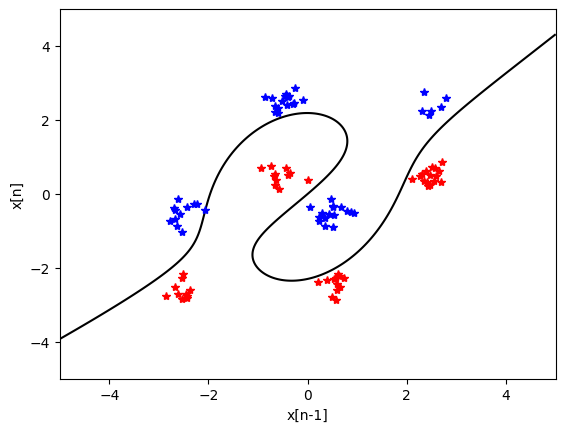

Weights of the MMSE solution:
[ 0.77254829 -0.67464763 -0.02712285  0.01483498  0.07157569 -0.21355878
  0.13403936  0.31605184 -0.1913802  -0.00531494]


In [111]:
def volterra_expansion(X):
    N = X.shape[1]
    X_volterra = np.zeros((10, N))
    
    for n in range(N):
        x_n = X[:, n]                             # x[n], x[n-1]
        X_volterra[0, n] = x_n[0]                 # x[n]               # 1 st order
        X_volterra[1, n] = x_n[1]                 # x[n-1]             # 1 st order
        X_volterra[2, n] = x_n[0]**2              # x1^2               # 2 nd order
        X_volterra[3, n] = x_n[1]**2              # x2^2               # 2 nd order
        X_volterra[4, n] = x_n[0] * x_n[1]        # x1*x2              # 2 nd order
        X_volterra[5, n] = x_n[0]**3              # x1^3               # 3 rd order
        X_volterra[6, n] = x_n[1]**3              # x2^3               # 3 rd order
        X_volterra[7, n] = x_n[0]**2 * x_n[1]     # x1^2*x2            # 3 rd order
        X_volterra[8, n] = x_n[0] * x_n[1]**2     # x1*x2^2            # 3 rd order
        X_volterra[9, n] = x_n[0]**2 * x_n[1]**2  # x1^2*x2^2          # 4 th order

        # Total Equation is
        # x[n], x[n-1], x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2, x1^2*x2^2
        
    return X_volterra

## Apply Volterra expansion to the data
X_volterra = volterra_expansion(X)

## Compute MMSE solution
X_volterra_squared = np.dot(X_volterra, X_volterra.T)
Xy = np.dot(X_volterra,y )

w_mmse = np.linalg.solve(X_volterra_squared, Xy)

## Generate decision boundary
# Define a grid of points in the input space
num_points = 400
x_values = np.linspace(-5, 5, num_points)
y_values = np.linspace(-5, 5, num_points)
xx, yy = np.meshgrid(x_values, y_values)
# Create a matrix containing all pairs of x and y coordinates
X_boundary = np.vstack((xx.ravel(), yy.ravel()))
# Apply the Volterra expansion to the grid points
X_volterra_boundary = volterra_expansion(X_boundary)
# Compute the decision boundary using the MMSE weights and Volterra-expanded data
decision_boundary = np.dot(w_mmse, X_volterra_boundary)


## Plot the decision boundary and data points
plt.contour(xx, yy, decision_boundary.reshape(xx.shape), levels=[0], colors='black')
plt.plot(X[0,ind1],X[1,ind1],'b*')
plt.plot(X[0,ind2],X[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.show()

## Print the weights of the MMSE solution
print("Weights of the MMSE solution:")
print(w_mmse)

## Volterra Expansion
### x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2, x1^4, x2^4, x1^2*x2^2

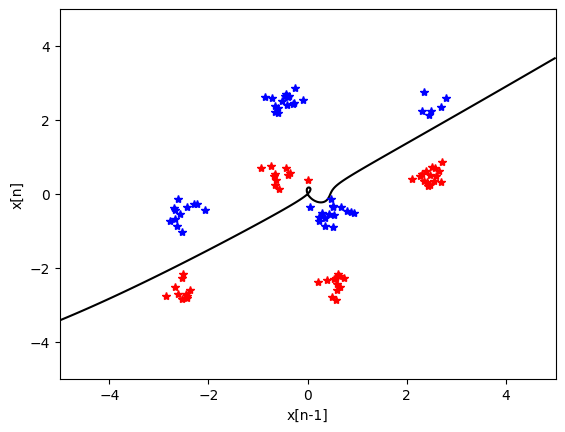

Weights of the MMSE solution:
[ 0.0338835  -0.00990146 -0.01415022 -0.071043    0.05969676  0.0558561
  0.01641181 -0.00620314  0.00015725  0.0089397 ]


In [112]:
def volterra_expansion(X):
    N = X.shape[1]
    X_volterra = np.zeros((10, N))
    
    for n in range(N):
        x_n = X[:, n]                             # x[n], x[n-1]
        X_volterra[0, n] = x_n[0]**2              # x1^2               # 2 nd order
        X_volterra[1, n] = x_n[1]**2              # x2^2               # 2 nd order
        X_volterra[2, n] = x_n[0] * x_n[1]        # x1*x2              # 2 nd order
        X_volterra[3, n] = x_n[0]**3              # x1^3               # 3 rd order 
        X_volterra[4, n] = x_n[1]**3              # x2^3               # 3 rd order 
        X_volterra[5, n] = x_n[0]**2 * x_n[1]     # x1^2*x2            # 3 rd order
        X_volterra[6, n] = x_n[0] * x_n[1]**2     # x1*x2^2            # 3 rd order
        X_volterra[7, n] = x_n[0]**4              # x1^4               # 4 th order
        X_volterra[8, n] = x_n[1]**4              # x2^4               # 4 th order
        X_volterra[9, n] = x_n[0]**2 * x_n[1]**2  # x1^2*x2^2          # 4 th order

        # Total Equation is
        # x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2, x1^4, x2^4, x1^2*x2^2
        
    return X_volterra

## Apply Volterra expansion to the data
X_volterra = volterra_expansion(X)

## Compute MMSE solution
X_volterra_squared = np.dot(X_volterra, X_volterra.T)
Xy = np.dot(X_volterra,y )

w_mmse = np.linalg.solve(X_volterra_squared, Xy)

## Generate decision boundary
# Define a grid of points in the input space
num_points = 400
x_values = np.linspace(-5, 5, num_points)
y_values = np.linspace(-5, 5, num_points)
xx, yy = np.meshgrid(x_values, y_values)
# Create a matrix containing all pairs of x and y coordinates
X_boundary = np.vstack((xx.ravel(), yy.ravel()))
# Apply the Volterra expansion to the grid points
X_volterra_boundary = volterra_expansion(X_boundary)
# Compute the decision boundary using the MMSE weights and Volterra-expanded data
decision_boundary = np.dot(w_mmse, X_volterra_boundary)


## Plot the decision boundary and data points
plt.contour(xx, yy, decision_boundary.reshape(xx.shape), levels=[0], colors='black')
plt.plot(X[0,ind1],X[1,ind1],'b*')
plt.plot(X[0,ind2],X[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.show()

## Print the weights of the MMSE solution
print("Weights of the MMSE solution:")
print(w_mmse)

## Volterra Expansion
### x1^3, x2^3, x1^2*x2, x1*x2^2, x1^4, x2^4, x1^2*x2^2, x1^3*x2, x1*x2^3, x1^5

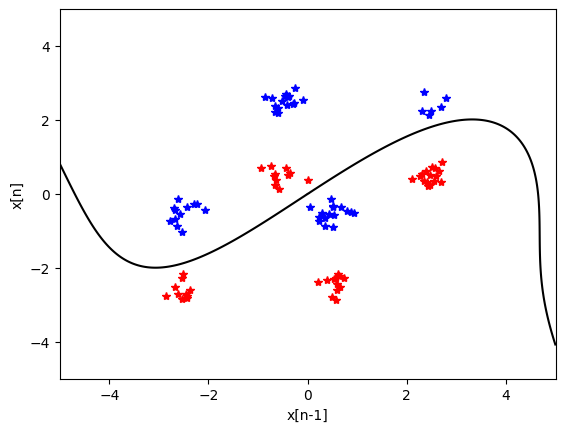

Weights of the MMSE solution:
[-0.098817    0.06123346  0.04507643  0.02376345  0.000226   -0.00012782
  0.00702592 -0.00650251  0.00390683  0.00452939]


In [113]:
def volterra_expansion(X):
    N = X.shape[1]
    X_volterra = np.zeros((10, N))
    
    for n in range(N):
        x_n = X[:, n]                             # x[n], x[n-1]
        X_volterra[0, n] = x_n[0]**3              # x1^3               # 3 rd order 
        X_volterra[1, n] = x_n[1]**3              # x2^3               # 3 rd order 
        X_volterra[2, n] = x_n[0]**2 * x_n[1]     # x1^2*x2            # 3 rd order 
        X_volterra[3, n] = x_n[0] * x_n[1]**2     # x1*x2^2            # 3 rd order
        X_volterra[4, n] = x_n[0]**4              # x1^4               # 4 th order
        X_volterra[5, n] = x_n[1]**4              # x2^4               # 4 th order
        X_volterra[6, n] = x_n[0]**2 * x_n[1]**2  # x1^2*x2^2          # 4 th order
        X_volterra[7, n] = x_n[0]**3 * x_n[1]     # x1^3*x2            # 4 th order
        X_volterra[8, n] = x_n[0] * x_n[1]**3     # x1*x2^3            # 4 th order
        X_volterra[9, n] = x_n[0]**5              # x1^5               # 5 th order

        # Total Equation is
        # x1^3, x2^3, x1^2*x2, x1*x2^2, x1^4, x2^4, x1^2*x2^2, x1^3*x2, x1*x2^3, x1^5
        
    return X_volterra

## Apply Volterra expansion to the data
X_volterra = volterra_expansion(X)

## Compute MMSE solution
X_volterra_squared = np.dot(X_volterra, X_volterra.T)
Xy = np.dot(X_volterra,y )

w_mmse = np.linalg.solve(X_volterra_squared, Xy)

## Generate decision boundary
# Define a grid of points in the input space
num_points = 400
x_values = np.linspace(-5, 5, num_points)
y_values = np.linspace(-5, 5, num_points)
xx, yy = np.meshgrid(x_values, y_values)
# Create a matrix containing all pairs of x and y coordinates
X_boundary = np.vstack((xx.ravel(), yy.ravel()))
# Apply the Volterra expansion to the grid points
X_volterra_boundary = volterra_expansion(X_boundary)
# Compute the decision boundary using the MMSE weights and Volterra-expanded data
decision_boundary = np.dot(w_mmse, X_volterra_boundary)


## Plot the decision boundary and data points
plt.contour(xx, yy, decision_boundary.reshape(xx.shape), levels=[0], colors='black')
plt.plot(X[0,ind1],X[1,ind1],'b*')
plt.plot(X[0,ind2],X[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.show()

## Print the weights of the MMSE solution
print("Weights of the MMSE solution:")
print(w_mmse)